<a href="https://colab.research.google.com/github/MrRetyNine/cs102/blob/homework08/R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Задание 1

1. Загрузите датасет `music_genre.csv`.
2. Возьмите 20 тысяч случайных строк из датасета (**все остальные задания выполняйте для этих 20 тысяч строк!!!**)
3. Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.
4. Проверьте, есть ли а датасете строки, в которых значение в столбце `artist_name` – `empty_field`. Если есть, выведите эти строки и их количество. А затем удалите из датасета.

In [5]:
#code
data <- read.csv('music_genre.csv')
data <- data[sample(nrow(data), 20000,replace=FALSE),]

print(data[duplicated(data),][0])
data <- unique(data)
print(data[duplicated(data),][0])

nrow(data[data$artist_name == 'empty_field',])
data <- data[!data$artist_name == 'empty_field',]
nrow(data[data$artist_name == 'empty_field',])
data

data frame with 0 columns and 2 rows
data frame with 0 columns and 0 rows


[1] 968

[1] 0

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
10661,50597,BADBADNOTGOOD,Mono,37,0.750000,0.2610,58017,0.2520,4.03e-01,A,0.3600,-18.071,Minor,0.0361,145.648,4-Apr,0.4850,Jazz
39417,72049,John Mayer,New Light,84,0.325000,0.8280,216015,0.6890,3.84e-02,G,0.0808,-7.878,Major,0.0326,123.931,4-Apr,0.8530,Rock
21364,89860,Joe Diffie,New Way (To Light Up An Old Flame),38,0.396000,0.6590,162215,0.7200,0.00e+00,A,0.3420,-6.665,Major,0.0296,87.235,4-Apr,0.8870,Country
23342,21856,Kenny Chesney,Happy On The Hey Now (A Song For Kristi),37,0.809000,0.4230,328933,0.3530,2.58e-04,D#,0.7140,-14.292,Major,0.0491,72.35300000000001,4-Apr,0.4310,Country
34997,50046,Bonnie Raitt,Thing Called Love,33,0.042100,0.6580,230267,0.7660,1.60e-06,C,0.0526,-5.919,Major,0.0373,129.957,4-Apr,0.7270,Blues
42490,35802,John Tavener,Funeral Canticle,34,0.981000,0.0652,1434560,0.0179,6.01e-01,C#,0.1090,-39.109,Major,0.0417,73.979,4-Apr,0.0369,Classical
15723,82767,Rob Zombie,Two-Lane Blacktop,48,0.014900,0.5330,182667,0.9820,0.00e+00,A#,0.1070,-1.409,Minor,0.0910,142.276,4-Apr,0.6270,Alternative
11859,53638,Tex Beneke,A Wonderful Guy,50,0.891000,0.4040,115696,0.1820,4.29e-04,C#,0.0732,-13.295,Major,0.0690,204.16299999999998,3-Apr,0.8420,Jazz
16238,64327,Foo Fighters,These Days,60,0.000261,0.5320,-1,0.6640,0.00e+00,D,0.2050,-4.428,Major,0.0304,?,4-Apr,0.2150,Alternative


### Задание 2

1. Выведите долю каждого жанра в датасете.
2. Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.
3. Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.
4. Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Alternative       Anime       Blues   Classical     Country  Electronic 
   9.935748   10.262850   10.116822    9.766355    9.994159    9.778037 
    Hip-Hop        Jazz         Rap        Rock 
  10.023364   10.332944    9.725467   10.064252 


`summarise()` has grouped output by 'music_genre'. You can override using the
`.groups` argument.


music_genre,mode
<chr>,<chr>
,
Alternative,Major
Anime,Major
Blues,Major
Classical,Major
Country,Major
Electronic,Major
Hip-Hop,Major
Jazz,Major


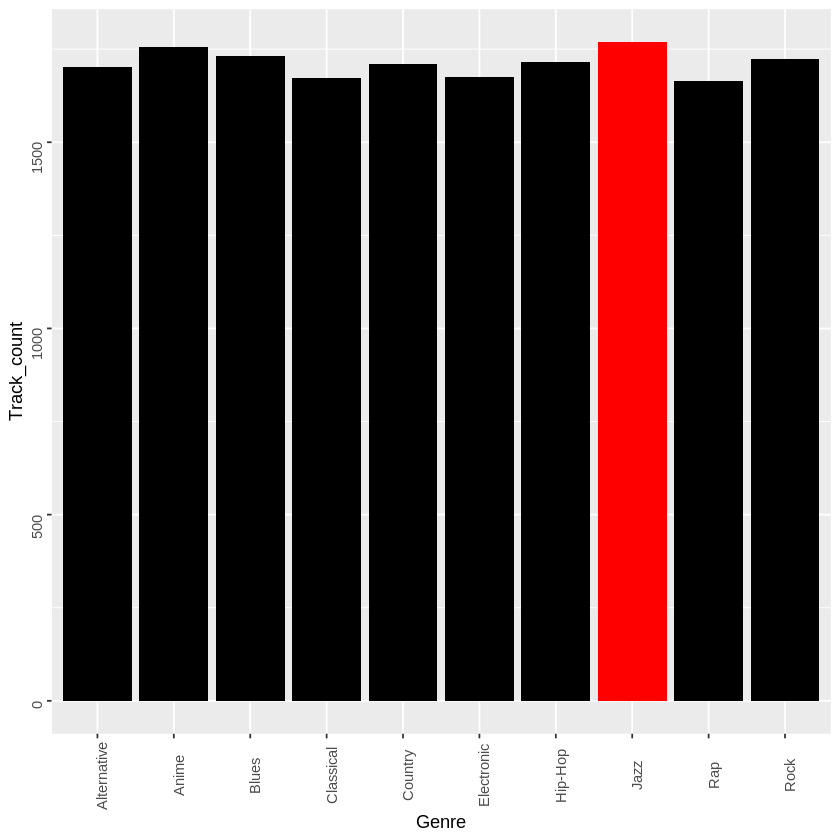

In [45]:
#code
install.packages("dplyr")
install.packages("ggplot2")
library(dplyr)
library(ggplot2)
genre <- prop.table(table(data$music_genre))*100
print(genre)

count_gen <- data %>%
  count(music_genre) %>%
  arrange(desc(n))

ggplot(count_gen,aes(x=music_genre,y=n,fill=n==max(n))) +
  geom_col()+
  scale_fill_manual(values=c('black','red'),guide=FALSE) +
  labs(x='Genre', y='Track_count')+
  theme(axis.text = element_text(angle = 90))

dancebuil <- aggregate(data$danceability, by=list(Genre=data$music_genre), FUN=mean)

# dancebuil[]
music_genre <- read.csv("music_genre.csv")
music_genre %>%
  group_by(music_genre, mode) %>%
  summarise(n = n()) %>%
  mutate(prop = n / sum(n)) %>%
  filter(prop == max(prop)) %>%
  select(music_genre, mode)

### Задание 3

1. Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.
2. Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



artist_name,n
<chr>,<int>
鉤貫レム(CV.斉藤壮馬),1
Nobuo Uematsu,156


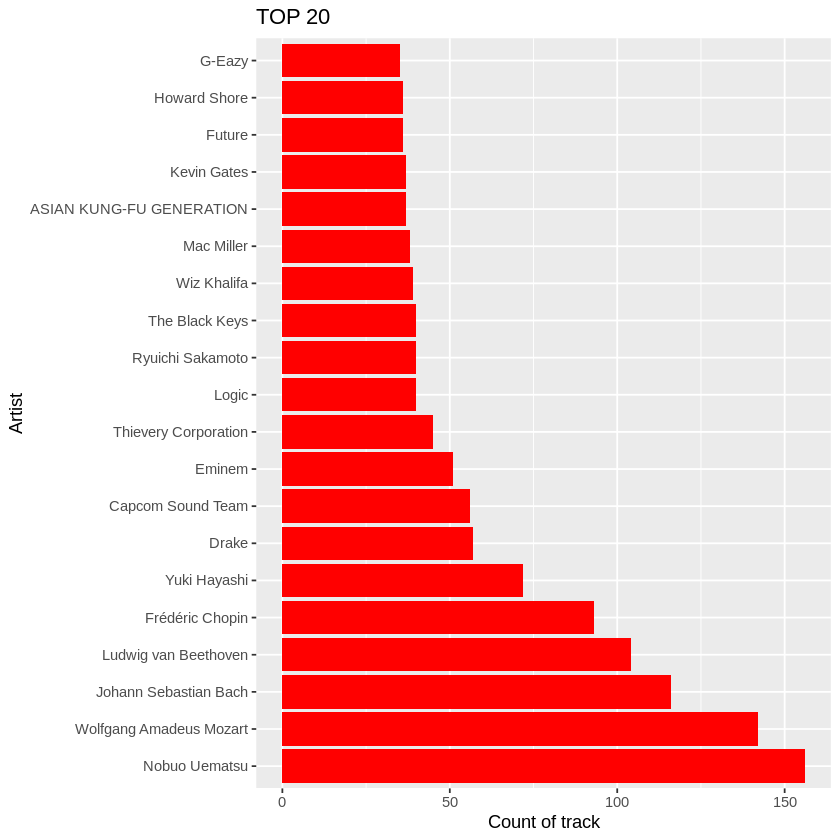

In [31]:
#code
install.packages("dplyr")
install.packages("ggplot2")
library(dplyr)
library(ggplot2)
data %>%
  count(artist_name) %>%
  arrange(desc(n)) %>%
  slice_tail(n = 1) %>%
  bind_rows(data %>% count(artist_name) %>% arrange(n) %>% tail(n = 1))

top_artists <- data %>%
  group_by(artist_name) %>%
  summarize(total_songs = n()) %>%
  top_n(20, total_songs) %>%
  arrange(desc(total_songs))

ggplot(top_artists, aes(y = reorder(artist_name, -total_songs), x = total_songs)) +
  geom_bar(stat = "identity", fill = "red") +
  theme(axis.text.y = element_text(hjust = 1)) +
  ggtitle("TOP 20") +
  xlab("Count of track") +
  ylab("Artist")


### Задание 4

1. Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная корреляция? Между какими слабая? Есть ли характеристики, между которыми корреляции практически нет.
2. Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10661,50597,37,0.7500,0.2610,58017,0.2520,4.03e-01,0.3600,-18.071,0.0361,0.4850
39417,72049,84,0.3250,0.8280,216015,0.6890,3.84e-02,0.0808,-7.878,0.0326,0.8530
21364,89860,38,0.3960,0.6590,162215,0.7200,0.00e+00,0.3420,-6.665,0.0296,0.8870
23342,21856,37,0.8090,0.4230,328933,0.3530,2.58e-04,0.7140,-14.292,0.0491,0.4310
34997,50046,33,0.0421,0.6580,230267,0.7660,1.60e-06,0.0526,-5.919,0.0373,0.7270
42490,35802,34,0.9810,0.0652,1434560,0.0179,6.01e-01,0.1090,-39.109,0.0417,0.0369


,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
instance_id,1.000,0.013,-0.015,-0.007,-0.001,0.024,-0.012,0.010,0.019,0.000,0.007
popularity,0.013,1.000,-0.284,0.353,-0.105,0.211,-0.365,-0.043,0.311,0.224,0.129
acousticness,-0.015,-0.284,1.000,-0.350,0.081,-0.793,0.381,-0.100,-0.734,-0.166,-0.267
danceability,-0.007,0.353,-0.350,1.000,-0.198,0.266,-0.309,-0.048,0.397,0.275,0.434
duration_ms,-0.001,-0.105,0.081,-0.198,1.000,-0.094,0.166,0.017,-0.141,-0.104,-0.181
energy,0.024,0.211,-0.793,0.266,-0.094,1.000,-0.383,0.185,0.841,0.161,0.389


-0.1050506

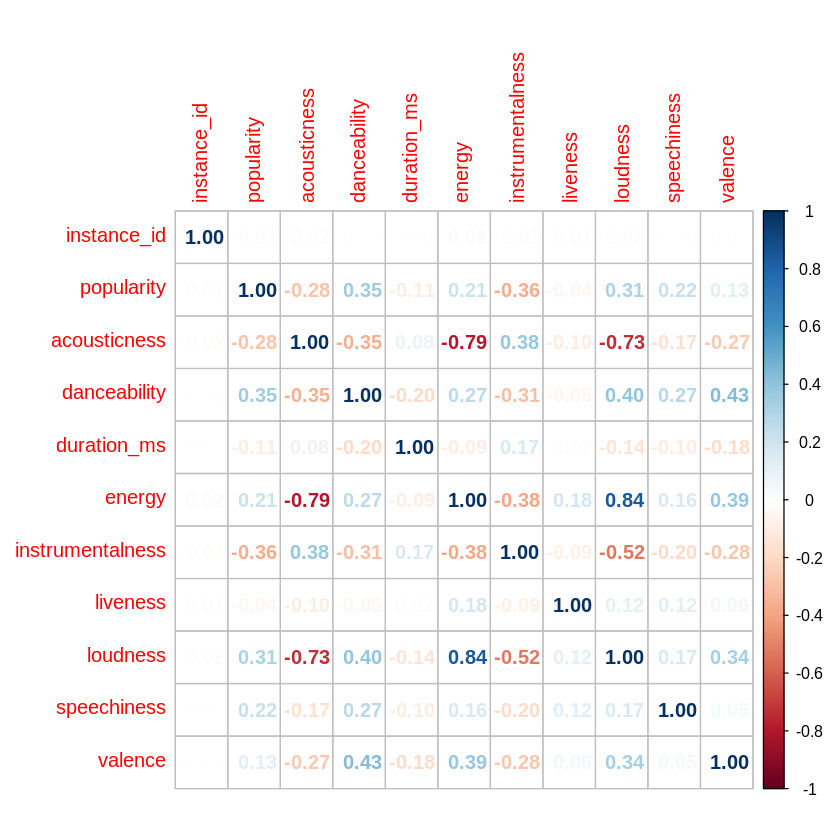

In [30]:
#code
install.packages("corrplot")
library(corrplot)

cor_df <- select_if(data, is.numeric)
head(cor_df)
M<-cor(cor_df, use="pairwise.complete.obs")
head(round(M,3))

corrplot(M, method="number")

cat(cor(data$popularity, data$duration_ms, use= 'complete.obs'))

### Задание 5

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“Removed 5 rows containing non-finite values (`stat_boxplot()`).”


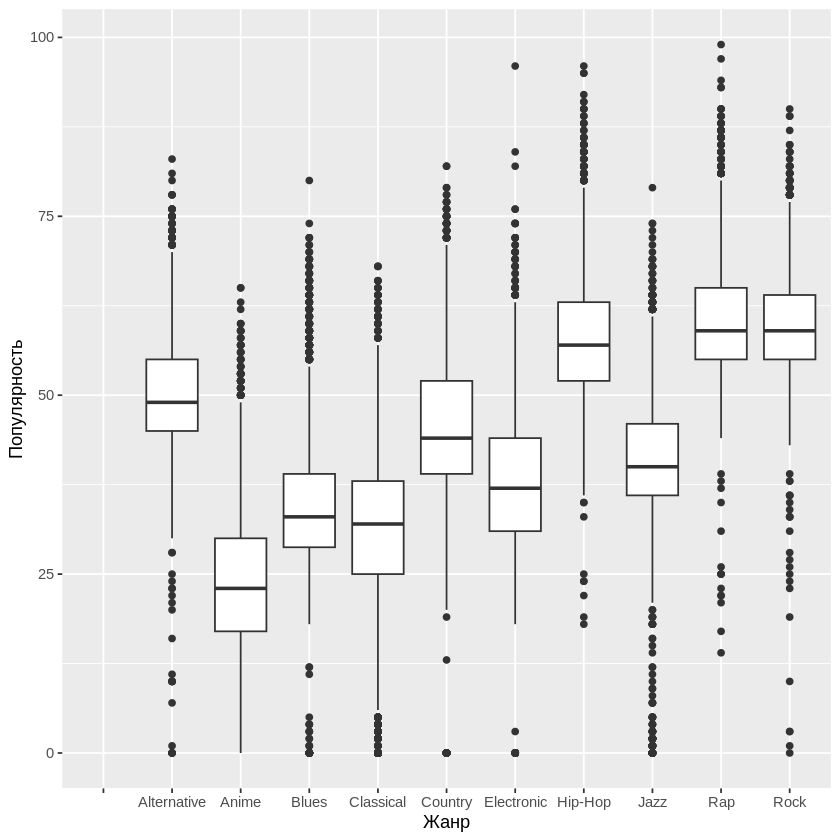

In [27]:
#code
install.packages("ggplot2")
library(ggplot2)

music_genre <- read.csv("music_genre.csv")

ggplot(music_genre, aes(x = music_genre, y = popularity)) +
  geom_boxplot() +
  xlab("Жанр") +
  ylab("Популярность")

### Задание 7

На вертикальной столбиковой диаграмме для самого популярного (popularity) и самого непопулярного жанров покажите средние значения по всем характеристикам. Отрицательные и положительные значения характеристик показывайте разными цветами.

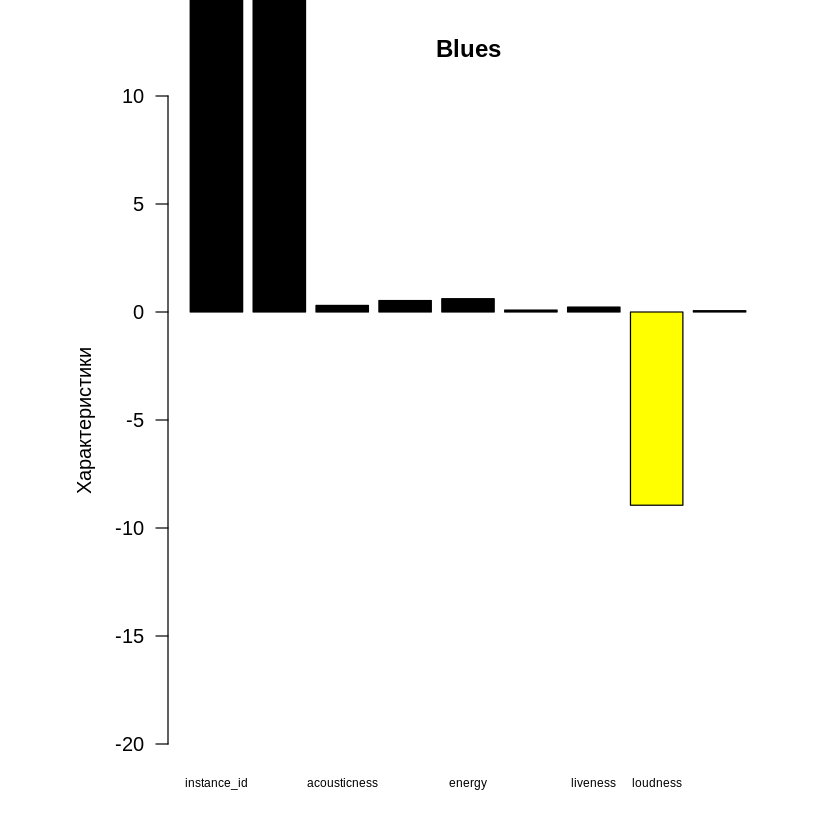

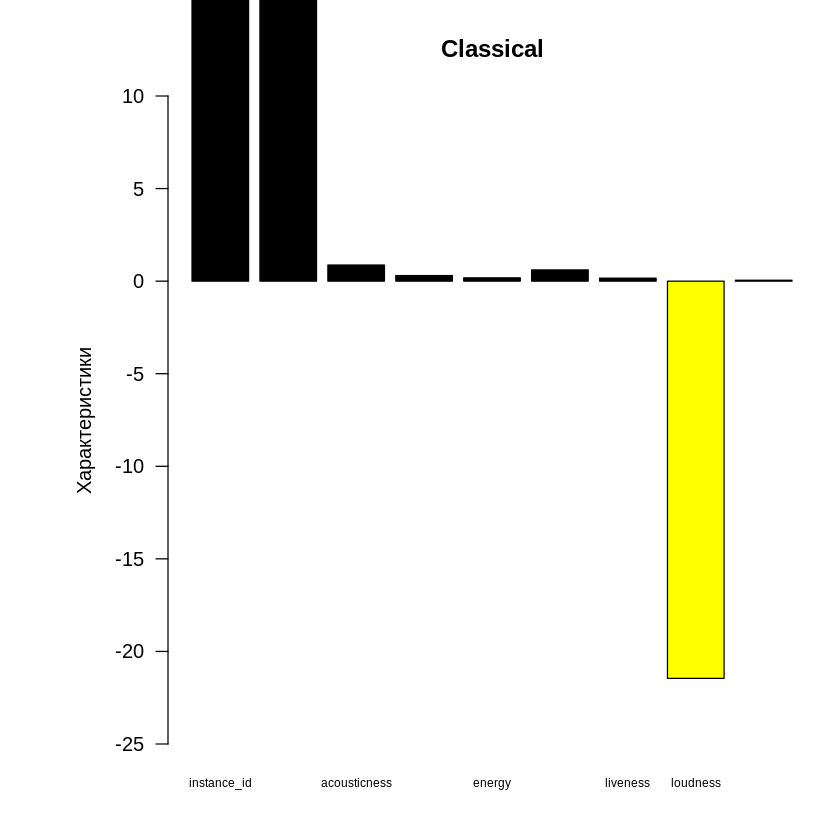

In [44]:
#code
library(ggplot2)
library(tidyr)
library(dplyr)

grouped_data <- data %>% group_by(music_genre)  %>%
                      summarise(status = mean(valence))

most_popular_genre <- (grouped_data %>% filter(max(status) == status))[[1]]
most_unpopular_genre <- (grouped_data %>% filter(min(status) == status))[[1]]
ee <- subset(data, music_genre == most_popular_genre)
yy <- subset(data, music_genre == most_unpopular_genre)

ee <- ee[,!names(ee) %in% c("id", "valence", "duration_ms")]
yy <- yy[,!names(yy) %in% c("id", "valence", "duration_ms")]

ee <- ee[ , unlist(lapply(ee, is.numeric))]
yy <- yy[ , unlist(lapply(yy, is.numeric))]

X <- as.numeric(unlist(colMeans(ee)))
Y <- names(unlist(colMeans(ee)))

colors <- ifelse(X < 0, 'yellow', 'black')

par(mar=c(4,7,4,3))
barplot(X, names.arg=Y,
        ylab="Характеристики",
        col=colors,
        main=most_popular_genre,
        beside=TRUE,
        cex.names=0.6,
        ylim=c(-20, 10),
        las=1)

X <- as.numeric(unlist(colMeans(yy)))
Y <- names(unlist(colMeans(yy)))

colors <- ifelse(X < 0, 'yellow', 'black')

par(mar=c(4,7,4,1))
barplot(X, names.arg=Y,
        ylab="Характеристики",
        col=colors,
        main=most_unpopular_genre,
        beside=TRUE,
        cex.names=0.6,
        ylim=c(-25, 10),
        las=1)

### Задание 8

1. Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая" (<=3min), "средняя" (>3min, <=5min), "длинная" (>5min).
2. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.
3. На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности.

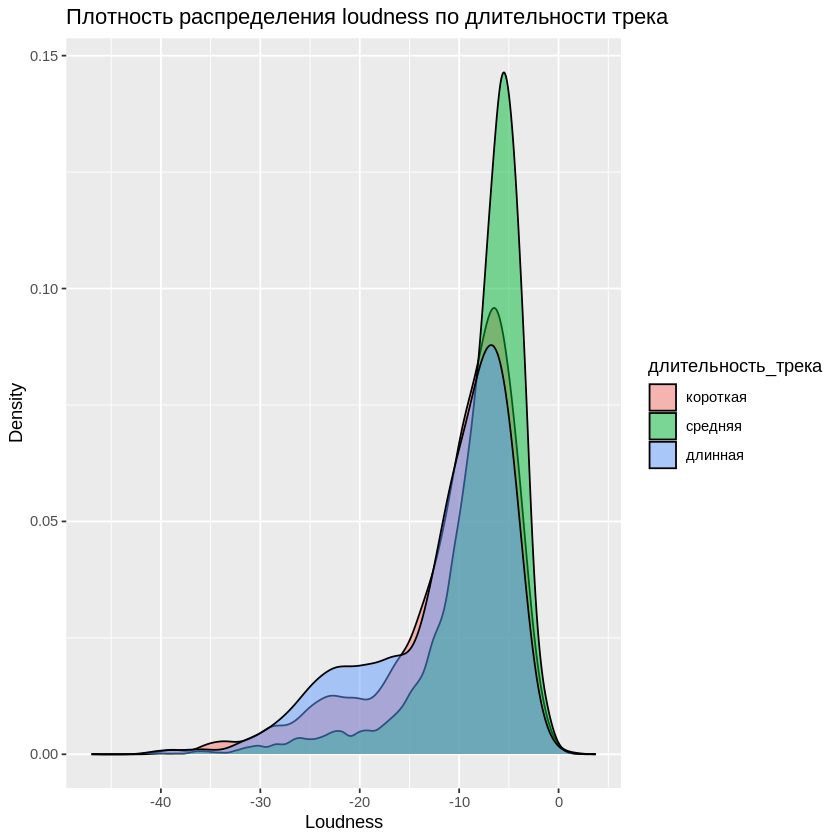

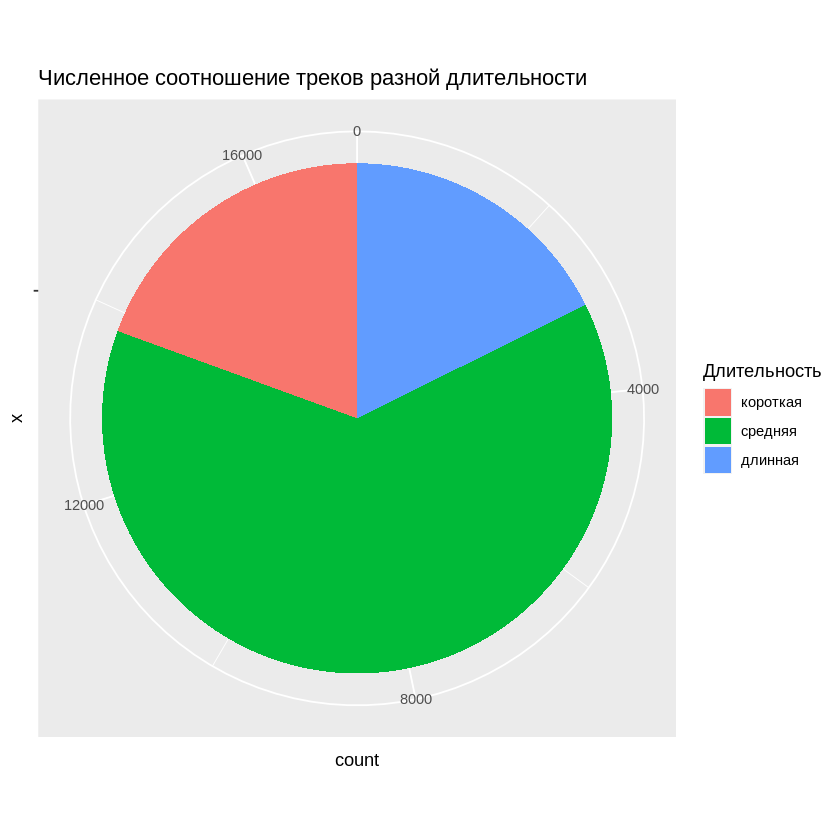

In [25]:
#code
library(ggplot2)
data$длительность_трека <- cut(data$duration_ms/1000/60,
                                      breaks = c(0, 3, 5, Inf),
                                      labels = c("короткая", "средняя", "длинная"),
                                      include.lowest = TRUE)

data <- subset(data,длительность_трека!='NA')
ggplot(data, aes(x = loudness, fill = длительность_трека)) +
  geom_density(alpha = 0.5) +
  xlab("Loudness") +
  ylab("Density") +
  ggtitle("Плотность распределения loudness по длительности трека")

ggplot(data, aes(x = "", fill = длительность_трека)) +
  geom_bar(width = 1) +
  coord_polar("y", start=0) +
  labs(fill = "Длительность") +
  ggtitle("Численное соотношение треков разной длительности")